In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('archive/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['mainroad']=encoder.fit_transform(df['mainroad'])
df['guestroom']=encoder.fit_transform(df['guestroom'])
df['basement']=encoder.fit_transform(df['basement'])
df['hotwaterheating']=encoder.fit_transform(df['hotwaterheating'])
df['airconditioning']=encoder.fit_transform(df['airconditioning'])
df['prefarea']=encoder.fit_transform(df['prefarea'])

In [4]:
X = df[['area', 'bathrooms', 'stories', 'airconditioning']]
y = df[['price']]
X

,area,bathrooms,stories,airconditioning
0,7420,2,3,1
1,8960,4,4,1
2,9960,2,2,0
3,7500,2,2,1
4,7420,1,2,1
...,...,...,...,...
540,3000,1,1,0
541,2400,1,1,0
542,3620,1,1,0
543,2910,1,1,0


In [9]:
# Q1 = np.percentile(np.array(X['area']), 25)
# Q3 = np.percentile(np.array(X['area']), 75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# data = np.array(X['area'])

# mask = np.array(X['area']>=lower_bound & X['area'] <= upper_bound)
# print(mask)

# #indices_to_drop = X[mask].index
# # X = X.drop(indices_to_drop)
# #filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
# #plt.boxplot(filtered_data,vert=True,patch_artist=True)

TypeError: Cannot perform 'rand_' with a dtyped [int64] array and scalar of type [bool]

In [6]:
X

,area,bathrooms,stories,airconditioning
0,7420,2,3,1
1,8960,4,4,1
2,9960,2,2,0
3,7500,2,2,1
4,7420,1,2,1
...,...,...,...,...
540,3000,1,1,0
541,2400,1,1,0
542,3620,1,1,0
543,2910,1,1,0


{'whiskers': [<matplotlib.lines.Line2D at 0x73f73f778c10>,
 'caps': [<matplotlib.lines.Line2D at 0x73f73f779150>,
 'boxes': [<matplotlib.patches.PathPatch at 0x73f73f7787f0>],
 'medians': [<matplotlib.lines.Line2D at 0x73f73f779690>],
 'fliers': [<matplotlib.lines.Line2D at 0x73f73f779930>],
 'means': []}

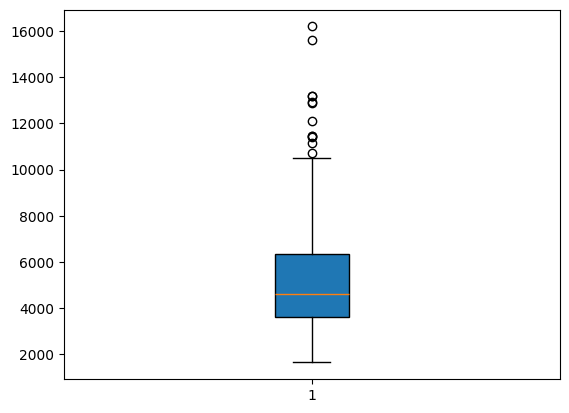

In [7]:
plt.boxplot(df['area'],vert=True,patch_artist=True)

In [8]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

X = pd.DataFrame(scalar.fit_transform(X),columns=['area', 'bathrooms', 'stories', 'airconditioning'])
y = pd.DataFrame(scalar.fit_transform(y),columns=['price'])

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

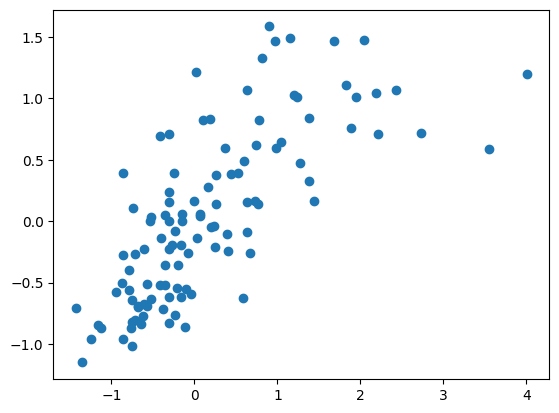

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(x_train,y_train)

predictions = regressor.predict(x_test)
plt.scatter(y_test,predictions)

In [11]:
from sklearn.metrics import r2_score
score = r2_score(y_test,predictions)
print(score)

0.524540091317703
